In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Movie dataset

In [3]:
df = pd.read_csv('archive/IMDb Movies India.csv', header=0, encoding='latin-1')

In [17]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [18]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [20]:
df.shape

(15509, 10)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [32]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [33]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [4]:
df.dropna(subset=['Rating'],inplace=True)

In [38]:
df.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [5]:
df.dropna(subset=['Duration','Genre','Actor 1','Actor 2','Actor 3'],inplace=True)

In [41]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [47]:
top_movie=df.loc[df['Rating'].sort_values(ascending=False)[:10].index]
top_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,(2020),94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,(2021),79 min,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
6852,June,(2021),93 min,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
14222,The Reluctant Crime,(2020),113 min,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,(2019),105 min,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
1314,Ashok Vatika,(2018),97 min,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
13231,Sindhustan,(2019),64 min,"Documentary, Family, History",9.3,36,Sapna Bhavnani,Leila Advani,Laj Badlani,Chaho Bhara
8344,Love Sorries,(2021),101 min,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
12673,Secrets of Sinauli,(2021),56 min,"Documentary, History",9.3,"1,373",Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
11843,Refl3ct,(2021),65 min,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar


# Exploratory Data Analytics

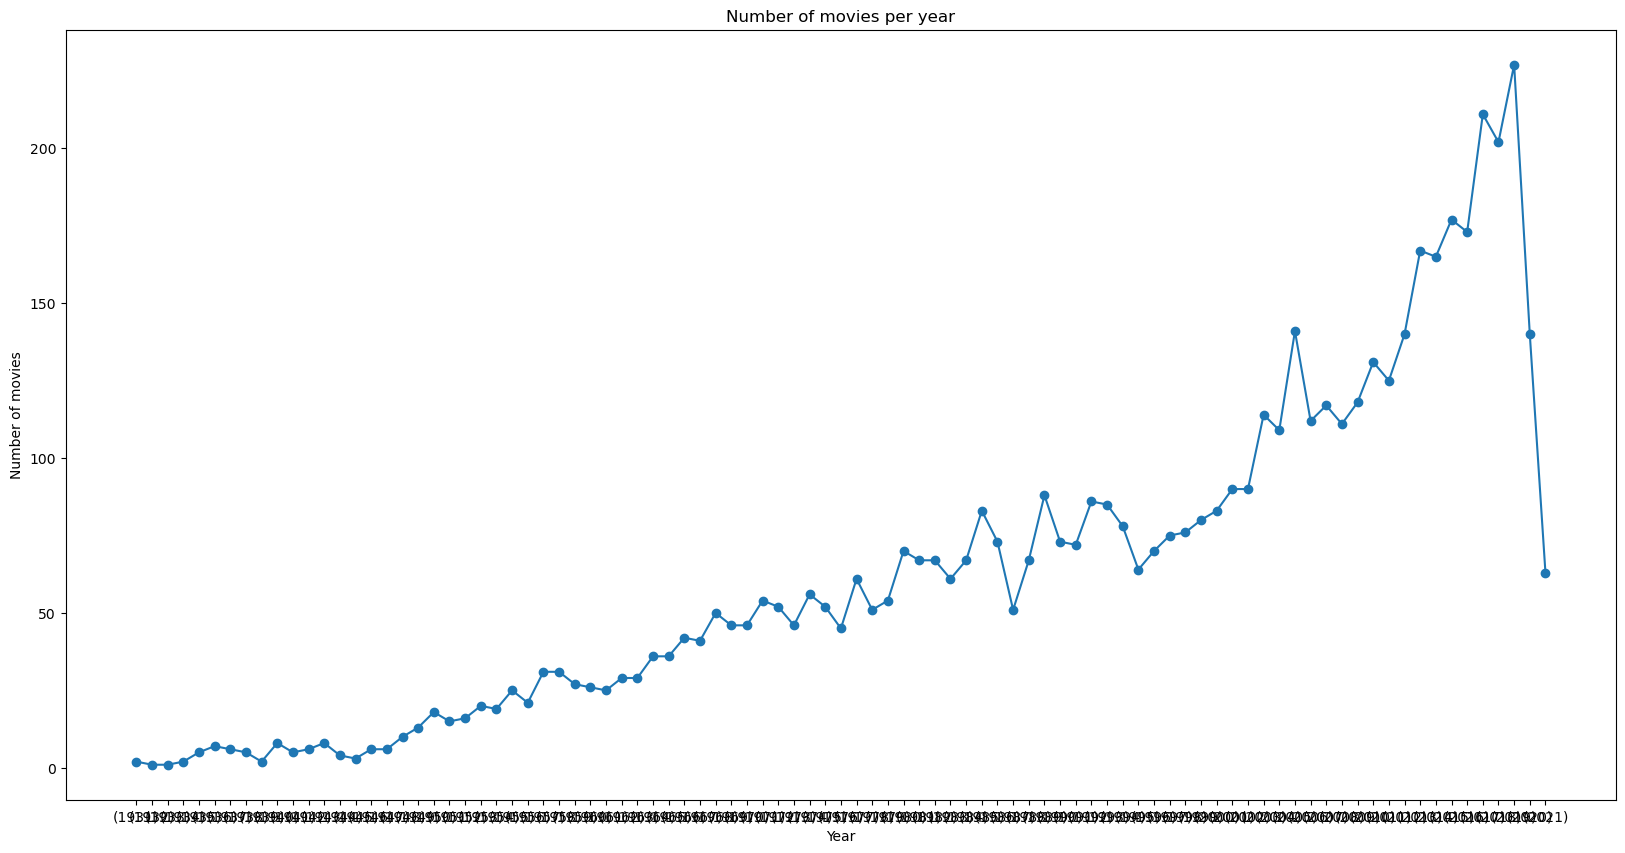

In [58]:

plt.figure(figsize=(20,10))

year_cnt = df['Year'].value_counts().sort_index()
years = year_cnt.index  # Extract year labels

# Plot using separate arguments for x and y axes
plt.plot(years, year_cnt, marker='o')  # Pass years list for x-axis

# Set labels and title using plt functions
plt.title('Number of movies per year')
plt.xlabel('Year')
plt.ylabel('Number of movies')

plt.show()

<Axes: >

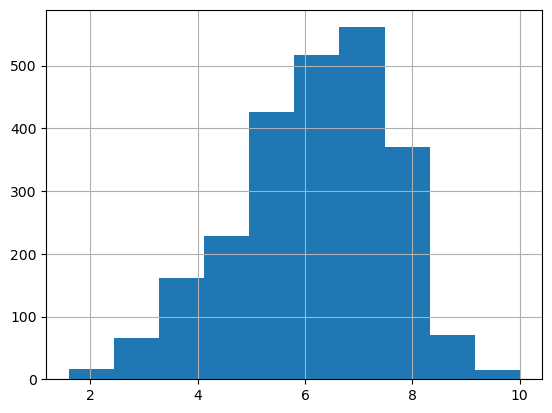

In [60]:

rd=df.groupby('Director')['Rating'].max().hist(bins=10)
rd

<Axes: >

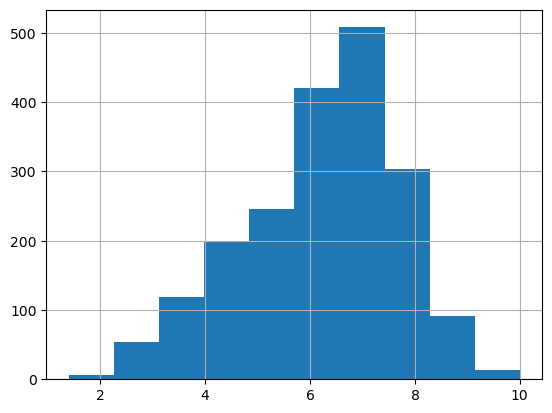

In [64]:
rd1=df.groupby('Actor 1')['Rating'].max().hist(bins=10)
rd1

<Axes: >

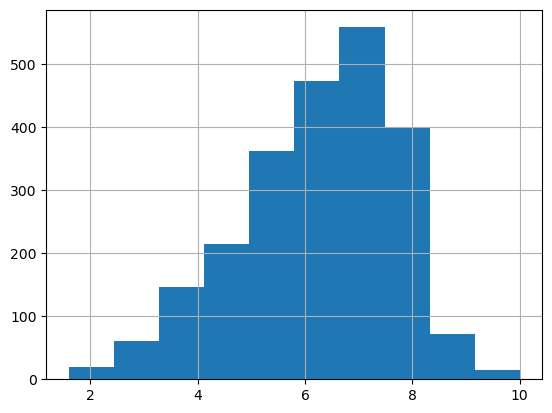

In [65]:
rd3=df.groupby('Actor 2')['Rating'].max().hist(bins=10)
rd3

<Axes: >

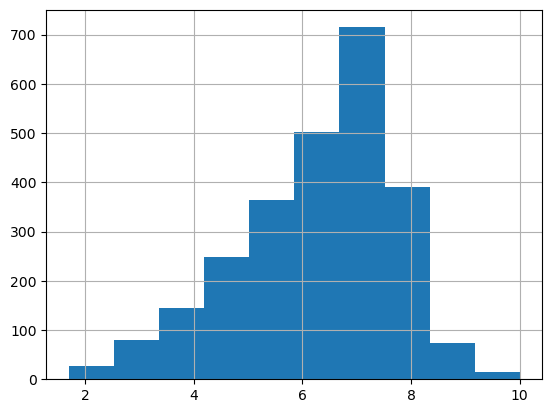

In [66]:
rd4=df.groupby('Actor 3')['Rating'].max().hist(bins=10)
rd4

In [67]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

C:\Users\STANDARD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\STANDARD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


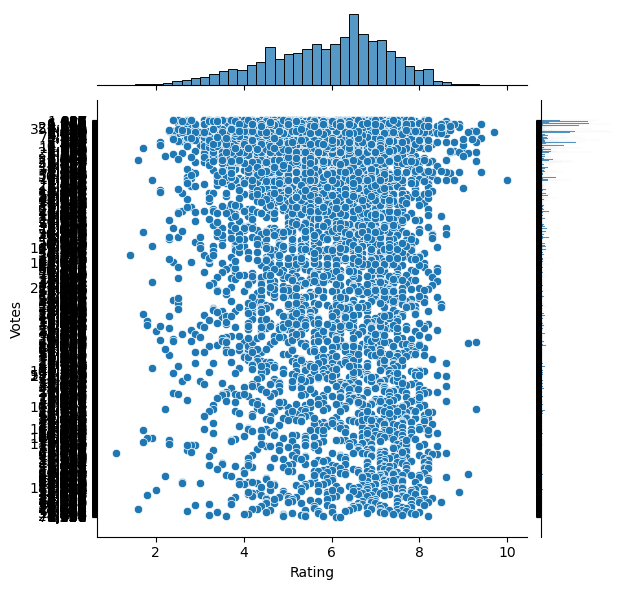

In [9]:
import seaborn as sns
sns.jointplot(x='Rating', y='Votes', data=df, kind='scatter')


In [19]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [40]:
from sklearn.preprocessing import LabelEncoder
new_data = df.drop(['Name'],axis=1)

lb=LabelEncoder()
# Encode the categorical features

new_data['Director'] = lb.fit_transform(df['Director'])
new_data['Actor 1'] = lb.fit_transform(df['Actor 1'])
new_data['Actor 2'] = lb.fit_transform(df['Actor 2'])
new_data['Actor 3'] = lb.fit_transform(df['Actor 3'])
new_data['Genre']=lb.fit_transform(df['Genre'].apply(lambda x:','.join(x)))
new_data['Year'] = new_data['Year'].str.extract(r'\((\d+)\)').astype(int)
new_data['Duration'] = new_data['Duration'].str.replace(' min', '').astype(int)
new_data['Votes'] = new_data['Votes'].str.replace(',',"").astype(int)
new_data.head()

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
x=new_data.drop(['Rating'],axis=1)
y=new_data['Rating']
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)
# Initializing and fitting the Decision Tree Regressor
decision_val = DecisionTreeRegressor()
decision_val.fit(x_train, y_train)

# Predicting on the test set
y_pred = decision_val.predict(x_test)

# Evaluation (example: mean squared error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.4368727915194346


Mean Squared Error: 1.6864004365428564
R-squared: 0.08929055052181334


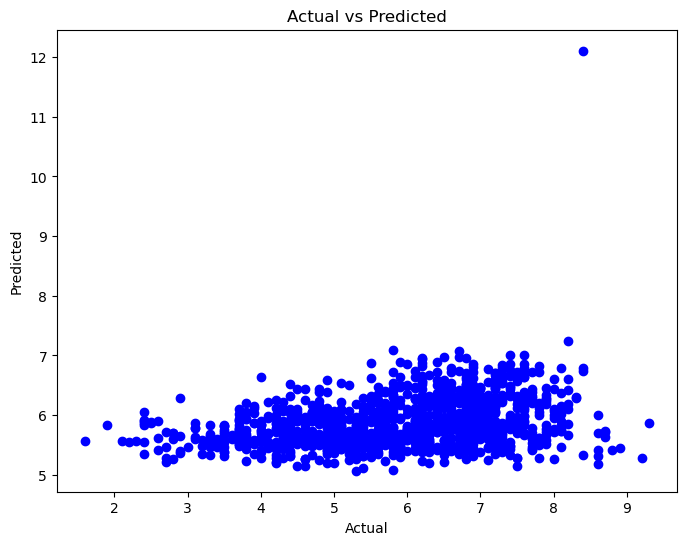

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Initialize and fit Linear Regression model
linreg = LinearRegression()
linreg.fit(x_train, y_train)

# Predict on test set
y_pred = linreg.predict(x_test)

# Evaluate using metrics for regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Other visualizations for actual vs predicted

C:\Users\STANDARD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\STANDARD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 800x600 with 0 Axes>

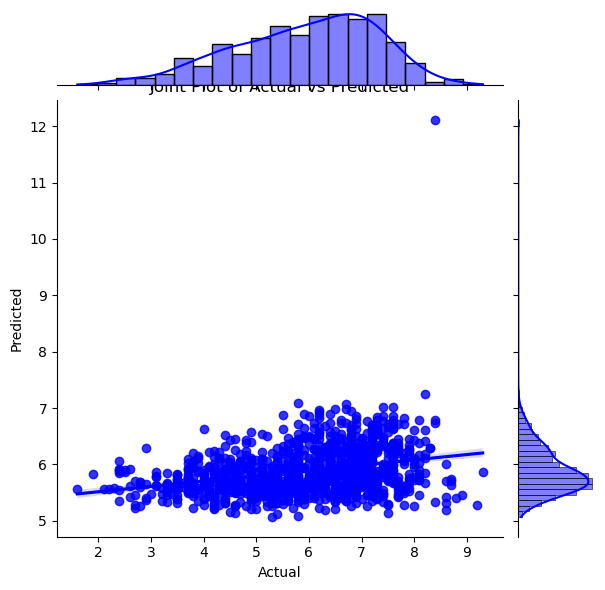

In [47]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.jointplot(x=y_test, y=y_pred, kind='reg', color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Joint Plot of Actual vs Predicted')
plt.show()


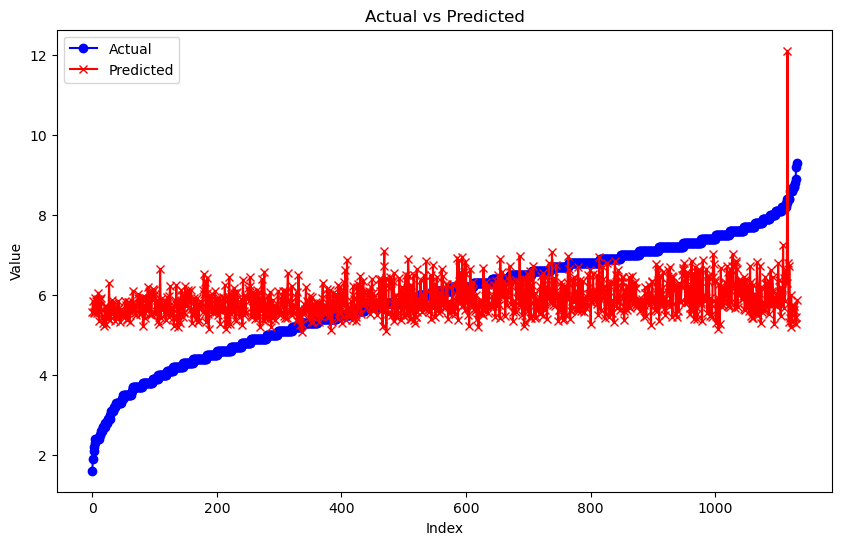

In [48]:

import matplotlib.pyplot as plt
import numpy as np


# Sort indices for better visualization
sort_idx = np.argsort(y_test)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test.iloc[sort_idx], label='Actual', marker='o', color='b')
plt.plot(np.arange(len(y_test)), y_pred[sort_idx], label='Predicted', marker='x', color='r')
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()
